# Laboratorio 1 Inteligencia de negocios - Regresión Lineal#

Grupo 17 - Miembros:


*   Juan Esteban Diaz Castro - 202121646
*   Jose Botello - 20
*   Samuel Ramirez - 20



In [1]:
!pip install numpy
!pip install pandas
!pip install joblib
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install scipy

In [2]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

# 1. Carga de los Datos

In [3]:
data = "/content/drive/MyDrive/BI Lab1/202510_Laboratorio 1 - Regresión_train_data.csv"

#data_val = "/content/Laboratorio 1/202510_Laboratorio 1 - Regresión_validation_data.csv"

star = pd.read_csv(data, sep=",", encoding="ISO-8859-1")

star_alpes = star.copy()

star_alpes.shape


(4000, 18)

In [4]:
star_alpes.sample(5)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
3239,1237648704047153169,199.197099,-0.355097,16.91053,15.03506,14.35427,14.14901,14.06790,752,3,372,0.835064,1,STAR,-0.000026,54652,0.000764,0.000130
1666,1237648702973542469,199.541979,-1.243673,15.44225,14.16943,13.49015,13.14345,12.87329,752,1,374,0.854074,1,GALAXY,0.019151,51690,-0.000558,0.001961
1345,1237648702969151537,189.554158,-1.149130,18.08561,16.70892,16.18050,15.97590,15.88361,752,1,307,0.825446,1,S,0.000470,54567,-0.001558,-0.000033
2210,1237648703510478991,199.669770,-0.822973,18.72229,17.34192,16.67519,16.27271,15.94496,752,2,375,0.871848,0,GALAXY,0.047202,51984,0.021369,-0.015619
2058,1237648722312364048,197.962573,0.839366,17.41793,16.44633,16.16479,16.07539,16.06459,756,5,549,0.830837,1,STAR,-0.000206,56727,0.003756,-0.001734


In [5]:
star_alpes.dtypes

,0
objid,int64
ra,float64
dec,float64
u,float64
g,float64
r,float64
i,float64
z,float64
run,int64
camcol,int64


# 2. Entendimiento de los Datos


 2.1. Características de los datos

Para los datos numéricos realizaremos un describe

In [6]:
star_alpes.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv
count,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1.237649e+18,185.523295,0.248959,18.609049,17.363397,16.839856,16.597712,16.439392,743.829000,3.37625,419.602000,0.851765,0.895500,0.134015,52957.124750,0.000218,-0.000090
std,4.244222e+11,41.689446,2.001075,0.839431,0.950964,1.055343,1.141252,1.190502,98.865936,1.69909,167.162063,0.071311,0.305946,0.379742,1601.148131,0.008794,0.007457
min,1.237646e+18,10.469743,-1.252763,13.551780,12.974870,12.362850,12.010790,11.799530,211.000000,1.00000,19.000000,0.301912,0.000000,-0.003322,51608.000000,-0.264516,-0.168807
25%,1.237649e+18,162.474666,-0.631824,18.170375,16.796110,16.190785,15.870782,15.628205,752.000000,2.00000,311.000000,0.836866,1.000000,0.000106,51821.000000,-0.001212,-0.001609
50%,1.237649e+18,195.815451,0.053336,18.843745,17.472525,16.850835,16.571195,16.402665,756.000000,3.00000,434.000000,0.860675,1.000000,0.032038,51986.000000,0.000322,0.000125
75%,1.237649e+18,214.348425,0.593396,19.261563,17.997818,17.506640,17.258833,17.147037,756.000000,5.00000,527.000000,0.879834,1.000000,0.086479,54468.000000,0.001698,0.001672
max,1.237650e+18,249.758313,13.854010,19.599750,22.497450,22.265960,28.179630,20.847690,1035.000000,6.00000,812.000000,0.961145,1.000000,4.192597,58932.000000,0.181871,0.128814


Para los datos categoricos haremos un value_counts

In [7]:
star_alpes["class"].value_counts()

,count
class,
GALAXY,1857
STAR,1629
QSO,292
S,177
G,44
QUASAR,1


2.2. Perfilamiento de los datos

<ipython-input-8-17a3c7c3b85a>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


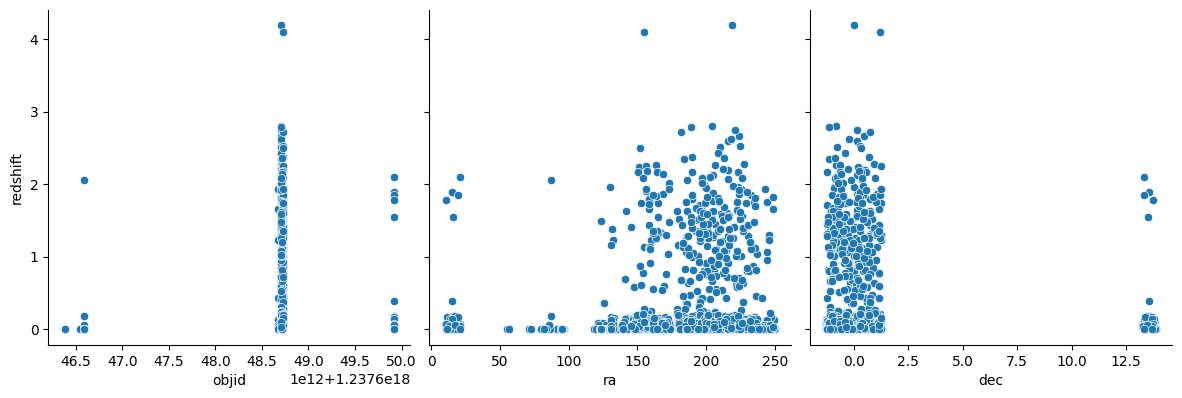

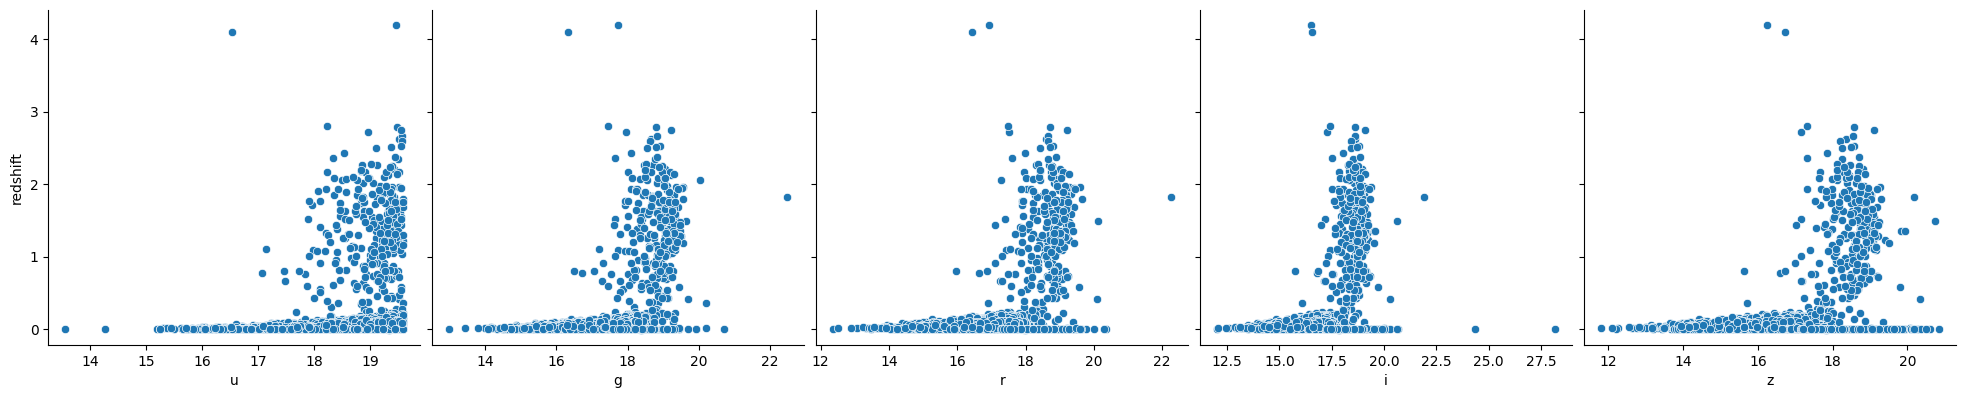

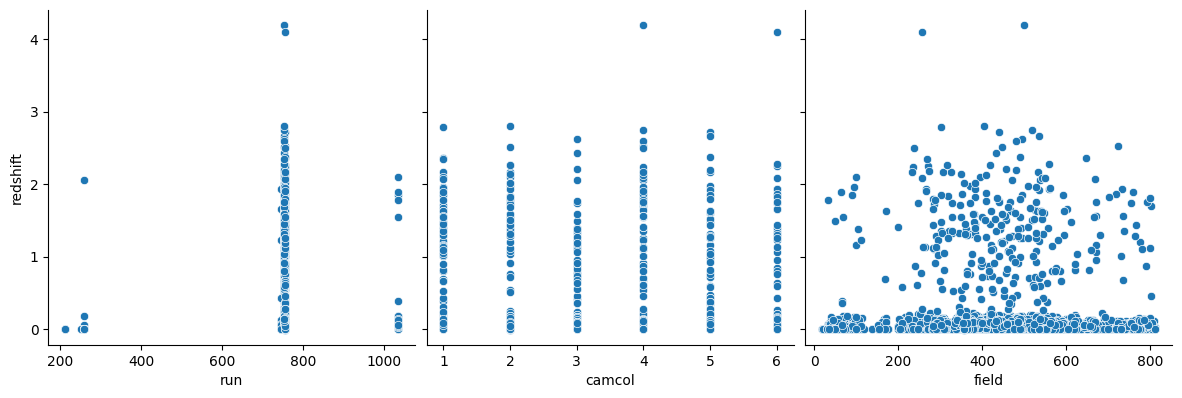

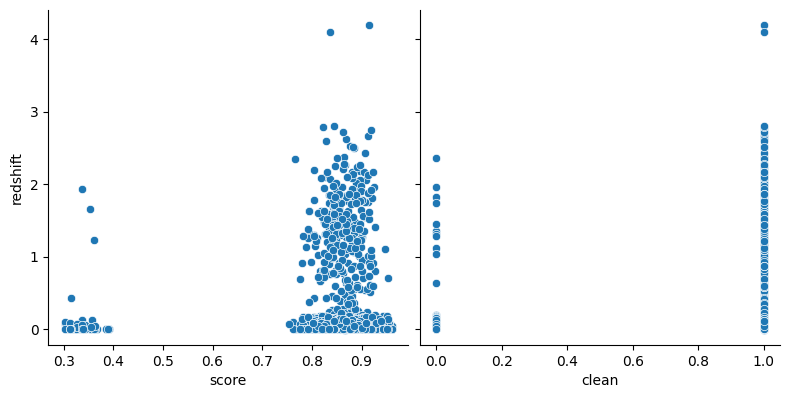

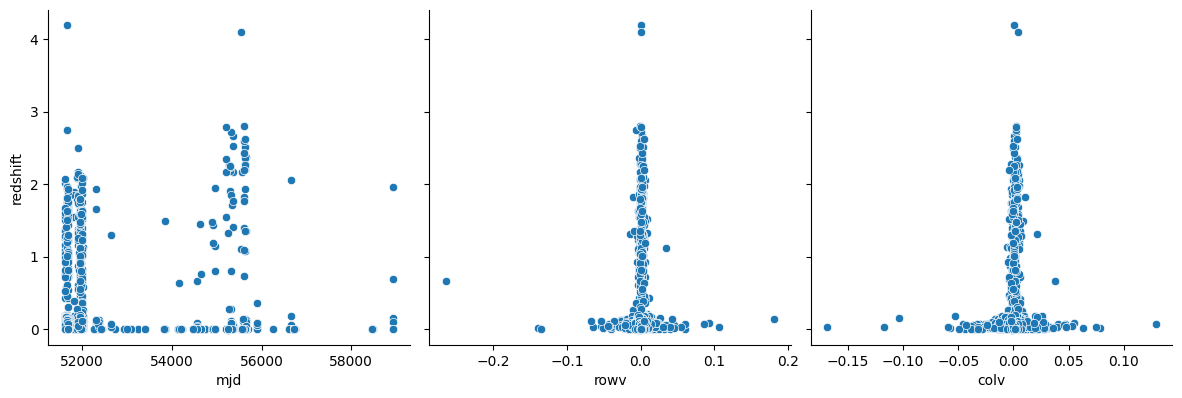

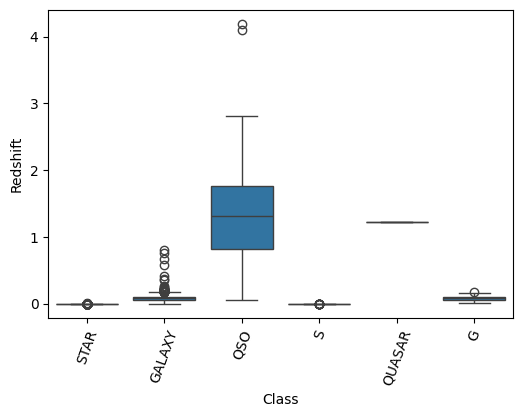

In [8]:
#Lo primero que haremos será ver la distribución de los datos para poder ir descartando algunas variables y
#ver los comportamientos de las variables en general.

var1=["objid", "ra", "dec"]
sns.pairplot(star_alpes.sample(frac=1), height=4, y_vars="redshift", x_vars=var1, kind="scatter")

var2=["u", "g", "r", "i", "z"]
sns.pairplot(star_alpes.sample(frac=1), height=4, y_vars="redshift", x_vars=var2, kind="scatter")

var3=["run", "camcol", "field"]
sns.pairplot(star_alpes.sample(frac=1), height=4, y_vars="redshift", x_vars=var3, kind="scatter")

var4=["score", "clean"]
sns.pairplot(star_alpes.sample(frac=1), height=4, y_vars="redshift", x_vars=var4, kind="scatter")

var5=["mjd", "rowv", "colv"]
sns.pairplot(star_alpes.sample(frac=1), height=4, y_vars="redshift", x_vars=var5, kind="scatter")

#Para class se utiliza un diagrama de bloques ya que es una variable categórica
fig = plt.figure(figsize=(6, 4))
ax = sns.boxplot(x = 'class', y = 'redshift', data = star_alpes)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.xlabel('Class')
plt.ylabel('Redshift')
plt.show()


Lo anterior nos muestra que hay variables que su distribución no afectan en nada al redshfit, entonces se podrían tener en cuenta para descartarlas posteriormente.

Algunas son el "objid", "run", "camcol", "rowv" y "colv".

Dejamos la variable "class" porque nos permitirá realizar un one hot para poder obtener una numerización de las variables categoricas, también dejamos el "clean" y "score" porque nos servirán para posteriormente realizar un filtrado y utilizar solo datos con un clean de 1, es decir confiables y con un score alto.

Ahora, las variables de "u", "g", "r", "i" y "z" son muy similares en cuanto a su distribución por lo que realizaremos un análisis de colinealidad para ver si podemos dejar todas o solo una de estas.

<Axes: >

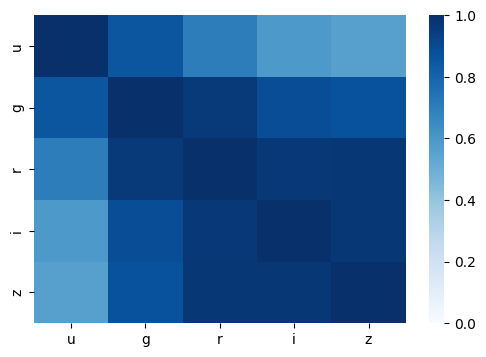

In [9]:
var = ["u", "g", "r", "i", "z"]

plt.figure(figsize=(6, 4))
sns.heatmap(star_alpes[var].corr(), cmap="Blues", vmin=0, vmax=1)

Lo anterior nos muestra como z tiene una alta correlación con las variables g, r e i. Lo mejor entonces es descartar esas tres variables y quedarnos con u y z porque su correlación no es tan alta, siendo aproximadamente de 0,6.

<Axes: >

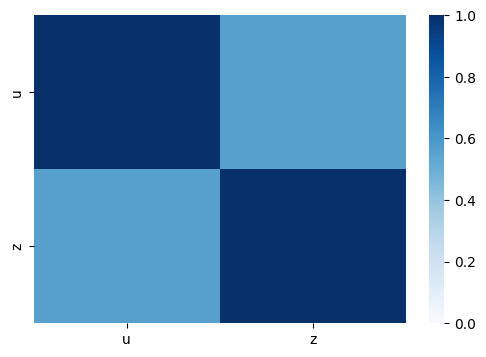

In [10]:
var = ["u", "z"]

plt.figure(figsize=(6, 4))
sns.heatmap(star_alpes[var].corr(), cmap="Blues", vmin=0, vmax=1)

Ahora bien haremos un análisis de correlación entre las variables que utilizaremos para la regresión.

Utilizaremos entonces las siguientes variables para comprobar si hay algún tipo de correlación.



<Axes: >

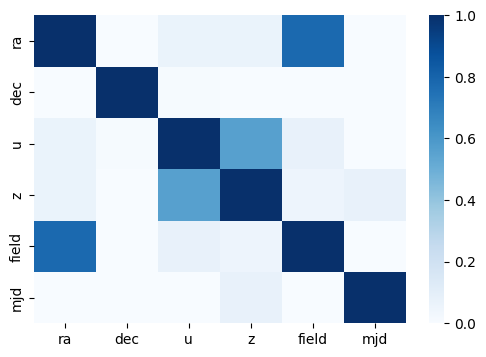

In [11]:
pos_var = ["ra", "dec", "u", "z", "field", "mjd"]

plt.figure(figsize=(6, 4))
sns.heatmap(star_alpes[pos_var].corr(), cmap="Blues", vmin=0, vmax=1)

Viendo el gráfico de correlación anterior podemos ver que las variables seleccionadas no poseen una alta correlación, revisamos nuevamente la correlación entre la variable "ra" y "field" y decidimos ignorar la variable field y mantener la variable "ra" ya que se tiene una alta correlación entre estas dos.

<Axes: >

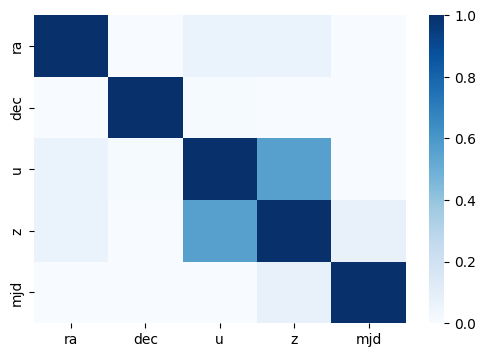

In [12]:
pos_var2 = ["ra", "dec", "u", "z", "mjd"]

plt.figure(figsize=(6, 4))
sns.heatmap(star_alpes[pos_var2].corr(), cmap="Blues", vmin=0, vmax=1)

2.3. Análisis de Calidad de Datos

2.3.1. Completitud

Vamos a revisar el porcentaje de registros vacios de todas las variables

In [13]:
df_porcentajes = (100*star_alpes.isna().sum()/len(star_alpes)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
objid,0.0
ra,0.0
rowv,0.0
mjd,0.0
redshift,0.0
class,0.0
clean,0.0
score,0.0
field,0.0
camcol,0.0


De lo anterior vemos que todos los registros estan completos, ahora miraremos en específico las variables que queremos utilizar para la regresión:

In [14]:
star_alpes[["redshift"]+pos_var2].isnull().sum() / star_alpes.shape[0]

,0
redshift,0.0
ra,0.0
dec,0.0
u,0.0
z,0.0
mjd,0.0


2.3.2. Unicidad

Revisaremos ahora entonces cuales y cuantas son las filas duplicadas:

In [15]:
duplicated_rows = star_alpes.loc[star_alpes.duplicated(subset=["redshift"]+["objid"], keep=False)].sort_values("objid")
duplicated_rows


,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
114,1237646382079606869,94.679499,0.842321,18.47695,16.94897,16.68126,16.59887,16.51747,211,6,359,0.806204,1,STAR,0.000207,52931,0.000372,-0.001017
3024,1237646382079606869,94.679499,0.842321,18.47695,16.94897,16.68126,16.59887,16.51747,211,6,359,0.806204,1,STAR,0.000207,52931,0.000372,-0.001017
1735,1237646382079672642,94.883887,0.990686,17.03847,15.47224,15.10297,14.97051,14.88297,211,6,360,0.806983,1,S,0.000012,52931,-0.001483,0.001376
897,1237646382079672642,94.883887,0.990686,17.03847,15.47224,15.10297,14.97051,14.88297,211,6,360,0.806983,1,S,0.000012,52931,-0.001483,0.001376
3254,1237648703513428079,206.374167,-0.781673,18.28101,17.18856,16.70175,16.33173,16.14626,752,2,420,0.904768,1,GALAXY,0.088136,51943,-0.002860,0.001156
88,1237648703513428079,206.374167,-0.781673,18.28101,17.18856,16.70175,16.33173,16.14626,752,2,420,0.904768,1,GALAXY,0.088136,51943,-0.002860,0.001156
3592,1237648705132888168,226.621828,0.595329,18.96363,18.67637,18.47234,18.41949,17.96547,752,5,555,0.871417,1,QSO,0.369813,51990,0.002106,-0.000110
2609,1237648705132888168,226.621828,0.595329,18.96363,18.67637,18.47234,18.41949,17.96547,752,5,555,0.871417,1,QSO,0.369813,51990,0.002106,-0.000110
1533,1237648705134461016,230.219374,0.560741,19.42733,19.27966,19.59048,19.86852,20.08571,752,5,579,0.875917,1,STAR,-0.000112,55327,-0.000059,0.000094
1991,1237648705134461016,230.219374,0.560741,19.42733,19.27966,19.59048,19.86852,20.08571,752,5,579,0.875917,1,STAR,-0.000112,55327,-0.000059,0.000094


Posteriormente de haberlas identificado, nos encargaremos de eliminar las filas duplicadas

2.3.3. Consistencia

Revisaremos la consistencia de los datos, especialmente de las variables categóricas:

In [16]:
star_alpes['class'].value_counts()

,count
class,
GALAXY,1857
STAR,1629
QSO,292
S,177
G,44
QUASAR,1


In [17]:
star_alpes.dtypes

,0
objid,int64
ra,float64
dec,float64
u,float64
g,float64
r,float64
i,float64
z,float64
run,int64
camcol,int64


2.3.4. Validez

Revisaremos que los datos esten en rangos y valores de acuerdo a lo establecido en el diccionario de datos.

Para los numéricos haremos un describe:

In [18]:
star_alpes.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,redshift,mjd,rowv,colv
count,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1.237649e+18,185.523295,0.248959,18.609049,17.363397,16.839856,16.597712,16.439392,743.829000,3.37625,419.602000,0.851765,0.895500,0.134015,52957.124750,0.000218,-0.000090
std,4.244222e+11,41.689446,2.001075,0.839431,0.950964,1.055343,1.141252,1.190502,98.865936,1.69909,167.162063,0.071311,0.305946,0.379742,1601.148131,0.008794,0.007457
min,1.237646e+18,10.469743,-1.252763,13.551780,12.974870,12.362850,12.010790,11.799530,211.000000,1.00000,19.000000,0.301912,0.000000,-0.003322,51608.000000,-0.264516,-0.168807
25%,1.237649e+18,162.474666,-0.631824,18.170375,16.796110,16.190785,15.870782,15.628205,752.000000,2.00000,311.000000,0.836866,1.000000,0.000106,51821.000000,-0.001212,-0.001609
50%,1.237649e+18,195.815451,0.053336,18.843745,17.472525,16.850835,16.571195,16.402665,756.000000,3.00000,434.000000,0.860675,1.000000,0.032038,51986.000000,0.000322,0.000125
75%,1.237649e+18,214.348425,0.593396,19.261563,17.997818,17.506640,17.258833,17.147037,756.000000,5.00000,527.000000,0.879834,1.000000,0.086479,54468.000000,0.001698,0.001672
max,1.237650e+18,249.758313,13.854010,19.599750,22.497450,22.265960,28.179630,20.847690,1035.000000,6.00000,812.000000,0.961145,1.000000,4.192597,58932.000000,0.181871,0.128814


Para los datos que se proporcionan se tienen las siguientes conclusiones de la validez:

- ra: No tiene restricciones
- dec: No tiene restricciones
- u: Valor mayor a 0, el mínimo es 13.55
- g: Valor mayor a 0, el mínimo es 12.97
- r: Valor mayor a 0, el mínimo es 12.36
- i: Valor mayor a 0, el mínimo es 12.01
- z: Valor mayor a 0, el mínimo es 11.79
- run: No tiene restricciones
- camcol: No tiene restricciones
- field: No tiene restricciones
- score: Valor entre 0 y 1, el mínimo es 0.3 y el máximo es 0.96
- clean: Valor binario, se cumple pues solo existen valores de 0 y 1
- mjd: Dia por lo cual es positivo, se cumple
- rowv: No tiene restricciones
- colv: No tiene restricciones

Esto nos permite ver que los datos cumplen los estandares de las variables numéricas.

Ahora revisamos las variables categóricas:

In [19]:
star_alpes.value_counts(["class"])

,count
class,
GALAXY,1857
STAR,1629
QSO,292
S,177
G,44
QUASAR,1


Lo anterior y de acuerdo con el diccionario de los datos nos muestra que hay errores en la clase de algunos datos, ya que las únicas clases aceptadas son: "STAR", "GALAXY" y "QSO". Esto lo solucionaremos más adelante en la preparación de los datos para el modelo.

De modo que tenemos que asignar las clases de la siguiente manera:

- S con STAR
- G con GALAXY
- QUASAR con QSO

# 3. Preparación de los Datos

3.1 Calidad de los Datos

Lo primero será eliminar las filas duplicadas:

In [20]:
star_alpes.drop_duplicates(subset = 'objid', keep = 'first', inplace = True)

duplicated_rows = star_alpes.loc[star_alpes.duplicated(subset=["redshift"]+["objid"], keep=False)].sort_values("objid")
duplicated_rows

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv


Ahora revisamos las clases de las filas:

In [21]:
star_alpes.loc[star_alpes['class'].apply(lambda s: str(s).upper() == 'S'),'class'] = 'STAR'
star_alpes.loc[star_alpes['class'].apply(lambda s: str(s).upper() == 'G'),'class'] = 'GALAXY'
star_alpes.loc[star_alpes['class'].apply(lambda s: str(s).upper() == 'QUASAR'),'class'] = 'QSO'

star_alpes['class'].value_counts()

,count
class,
GALAXY,1891
STAR,1800
QSO,292


Ahora generaremos el One Hot Encoder para la variable "class".

In [22]:
clases = np.array([['STAR'], ['GALAXY'], ['QSO']])

df = star_alpes

print(df)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

star_encoded = encoder.fit_transform(df[['class']])

nom_col = encoder.get_feature_names_out(['class'])
df_encoded = pd.DataFrame(star_encoded, columns=nom_col)

print(df_encoded)

star_alpes_f = pd.concat([df.drop(columns=['class']).reset_index(), df_encoded.reset_index()], axis = 1)

print(star_alpes_f)





                    objid          ra        dec         u         g  \
0     1237648722306924571  185.574486   0.701402  19.11034  17.62099   
1     1237648720167436418  203.801841  -0.853906  18.90957  17.62940   
2     1237648720685105352  160.034264  -0.421626  19.26340  17.67693   
3     1237648703510937836  200.807373  -0.682024  18.82022  17.77765   
4     1237648720161275992  189.792404  -1.001480  18.91391  19.05355   
...                   ...         ...        ...       ...       ...   
3995  1237648720690741273  172.826005  -0.484303  18.81890  17.89273   
3996  1237649918427267086   11.165126  13.745240  17.46665  15.96142   
3997  1237648720164684046  197.579529  -0.971573  19.45682  18.32555   
3998  1237648721206575779  124.877626  -0.048110  19.20158  17.31450   
3999  1237648720161800205  190.920230  -0.972532  17.63725  16.65544   

             r         i         z   run  camcol  field     score  clean  \
0     17.03464  16.82993  16.71711   756       5    466  0.

Ahora realizaremos un filtrado y eliminaremos las filas cuyos valores en clean sean de 0, es decir que sean lecturas sucias y podrían afectar el modelo.
Además, vamos a quitar las filas cuyos valores de score sean inferiores al 50% para poder tener una mayor precisión.

In [23]:
star_alpes_f = star_alpes_f[star_alpes_f['clean'] == 1]
star_alpes_f = star_alpes_f[star_alpes_f['score'] >= 0.50]

In [24]:
star_alpes_f.sample(5)

,index,objid,ra,dec,u,g,r,i,z,run,...,score,clean,redshift,mjd,rowv,colv,index,class_GALAXY,class_QSO,class_STAR
564,564,1237648704594903380,224.148321,0.126007,18.82476,18.26169,17.62213,17.16926,16.95647,752,...,0.950466,1,0.186297,51994,0.002609,0.001568,564,0.0,1.0,0.0
2770,2778,1237648720132374783,123.781714,-0.884386,18.58484,17.53114,17.21798,17.10965,17.08706,756,...,0.863719,1,0.000119,53816,-0.001627,0.000626,2770,0.0,0.0,1.0
3548,3562,1237648703509561395,197.629907,-0.833410,17.39430,16.43136,16.18655,16.08958,16.06799,752,...,0.862281,1,-0.000016,56727,-0.000875,-0.000530,3548,0.0,0.0,1.0
3236,3246,1237648705128759351,217.205530,0.440832,18.48909,17.58908,17.32750,17.23541,17.21278,752,...,0.820635,1,0.000124,51637,0.001147,0.001004,3236,0.0,0.0,1.0
2540,2547,1237648720160424046,187.826846,-0.848712,17.88818,16.63334,16.08460,15.76838,15.56421,756,...,0.865661,1,0.060579,51990,0.003194,0.003667,2540,1.0,0.0,0.0


Nos decicimos de la columna class y en su lugar hicimos 3 columnas binarias dependiendo de la clase donde se clasificaron los elementos.

También hicimos un filtrado y nos quedamos con los elementos que tienen un score mayor a 60% (0.6) y un clean de 1.

Ahora realizaremos la comprobación de correlación de las variables que queremos utilizar:

<Axes: >

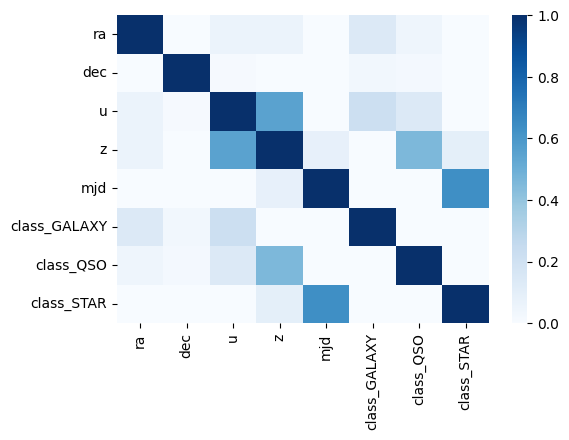

In [25]:
pos_var2 = ["ra", "dec", "u", "z", "mjd", "class_GALAXY", "class_QSO", "class_STAR"]

plt.figure(figsize=(6, 4))
sns.heatmap(star_alpes_f[pos_var2].corr(), cmap="Blues", vmin=0, vmax=1)

Como hay correlación entre las variables u y z, vamos a eliminar u y mjd, ya que hay correlación entre class_STAR y mjd, luego vamos a hacer entonces la separación de los datos de train y de test.

In [26]:
#Definimos las variables de la regresión a utilizar
variables_reg = ["ra", "dec", "z", "class_GALAXY", "class_QSO", "class_STAR"]

X_train, X_test, y_train, y_test = train_test_split(star_alpes_f[variables_reg], star_alpes_f["redshift"], test_size=0.3, random_state=1)

X_train.shape, y_train.shape

((2459, 6), (2459,))

In [27]:
X_test.shape, y_test.shape

((1055, 6), (1055,))

# 4. Modelado

Realizaremos entonces el proceso de modelado de los datos de train

In [31]:
regresion = LinearRegression()

regresion.fit(X_train, y_train)

LinearRegression()

La regresión se realiza con éxito y a continuación revisaremos sus coeficientes, el intercepto y las métricas de calidad.

In [32]:
pd.DataFrame({"columns":variables_reg, "coeficientes":regresion.coef_})

,columns,coeficientes
0,ra,-0.000142
1,dec,-0.000876
2,z,0.014138
3,class_GALAXY,-0.369314
4,class_QSO,0.830613
5,class_STAR,-0.461299


In [33]:
regresion.intercept_

0.2522937510994704

Vamos a graficar nuestra regresión en comparación a las Variables que utilizamos:

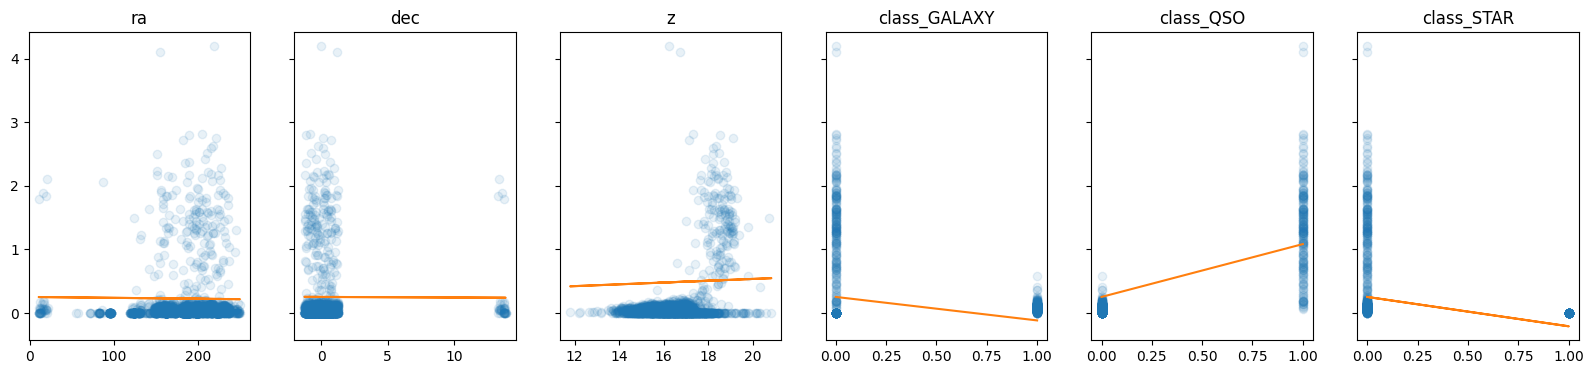

In [34]:
f, axs = plt.subplots(1, len(variables_reg), sharey=True, figsize=(20, 4))

for i in range(len(variables_reg)):
    col = variables_reg[i]
    x = X_train[col]
    m = regresion.coef_[i]
    b = regresion.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

4.1 Mean Absolute Error

In [35]:
print("MAE Test:", mean_absolute_error(y_test, regresion.predict(X_test)))

MAE Test: 0.06007608883719024


4.2 Root Mean Squeared Error

In [36]:
print("RMSE Test:", np.sqrt(mean_absolute_error(y_test, regresion.predict(X_test))))

RMSE Test: 0.24510424075725462


4.3 R^2

In [37]:
print("R2 Test:", r2_score(y_test, regresion.predict(X_test)))

R2 Test: 0.7814368279201895
